## Kaggle project - [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit)
This script will demonstrate the process of data pre-processing stey by step.
<br> Afterwards, two models-logistic regression and random forest have been built to make prediction.
<br> I also take a step further to try weight of evidence transformation; althought the result isn't as good as random forest, it achieved a AUC of 0.85 in Kaggle private score.
The dataset is i

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle
%matplotlib inline

pd.set_option('display.max_colwidth',100)

In [2]:
directory = r'/Users/canshuoguo/Downloads/GiveMeSomeCredit/'
data_description = pd.read_excel(directory+'Data Dictionary.xls',header=1)
data_description

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit ca...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [3]:
train_data = pd.read_csv(directory+'cs-training.csv')
train_data 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
# apparently, the first column is redundant.
train_data = train_data.iloc[:,1:]
# examine the data briefly
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
# check the missing values and missing rate respectively.
train_data.isnull().sum(), train_data.isnull().sum()/train_data.shape[0]

(Unnamed: 0                                  0
 SeriousDlqin2yrs                            0
 RevolvingUtilizationOfUnsecuredLines        0
 age                                         0
 NumberOfTime30-59DaysPastDueNotWorse        0
 DebtRatio                                   0
 MonthlyIncome                           29731
 NumberOfOpenCreditLinesAndLoans             0
 NumberOfTimes90DaysLate                     0
 NumberRealEstateLoansOrLines                0
 NumberOfTime60-89DaysPastDueNotWorse        0
 NumberOfDependents                       3924
 dtype: int64,
 Unnamed: 0                              0.000000
 SeriousDlqin2yrs                        0.000000
 RevolvingUtilizationOfUnsecuredLines    0.000000
 age                                     0.000000
 NumberOfTime30-59DaysPastDueNotWorse    0.000000
 DebtRatio                               0.000000
 MonthlyIncome                           0.198207
 NumberOfOpenCreditLinesAndLoans         0.000000
 NumberOfTimes90DaysL

In [6]:
# This dataset has 150,000 entries. 
# The variable 'MonthlyIncome' has 29,731 missing values and 'NumberOfDependents' has 3,924.

### Exploratory Data Analysis
use histogram and box plot to look at the distribution of each variable.

In [5]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


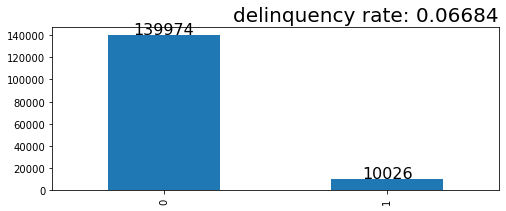

In [6]:
# response variable 
plt.figure(figsize=(8,3))
ax = train_data['SeriousDlqin2yrs'].value_counts().plot(kind='bar')
plt.text(0,train_data['SeriousDlqin2yrs'].value_counts()[0]+1000,train_data['SeriousDlqin2yrs'].value_counts()[0],
        ha='center',fontsize=16)
plt.text(1,train_data['SeriousDlqin2yrs'].value_counts()[1]+1000,train_data['SeriousDlqin2yrs'].value_counts()[1],
        ha='center',fontsize=16)
class_0 = train_data['SeriousDlqin2yrs'].value_counts()[0]
class_1 = train_data['SeriousDlqin2yrs'].value_counts()[1]
plt.title("delinquency rate: {}".format(class_1/(class_0+class_1)),fontsize=20,loc='right')
plt.show()

In [7]:
# use interquantile range to detect outliers
# to be honest, it is no need to pack it into a function because it only functions upon 'age' variable
# I could have clean 'age' variable step by step,
# but I thought why not pack it and by any chance, it could apply into other variables
def IQR(df,columns=None):
    outliers = dict()
    if columns == None:
        for i in df.columns:
            q25 = df[i].quantile(0.25)
            q75 = df[i].quantile(0.75)
            IQR = q75 - q25
            upper = q75 + 1.5*IQR
            lower = q25 - 1.5*IQR
            outliers[i] = [df[i].min(),lower,upper,df[i].max(),(df[i]<lower).mean(),(df[i]>upper).mean()]
    else:
        for i in columns:
            q25 = df[i].quantile(0.25)
            q75 = df[i].quantile(0.75)
            IQR = q75 - q25
            upper = q75 + 1.5*IQR
            lower = q25 - 1.5*IQR
            outliers[i] = [df[i].min(),lower,upper,df[i].max(),(df[i]<lower).mean(),(df[i]>upper).mean()]
    
    outlier_table = pd.DataFrame.from_dict(outliers,orient='index',
                       columns=['min','lower','upper','max','lowerRatio','upperRatio'])
    outlier_table['outlierRatio'] = outlier_table['lowerRatio'] + outlier_table['upperRatio']
    
    return outlier_table

In [8]:
IQR(train_data)

,min,lower,upper,max,lowerRatio,upperRatio,outlierRatio
SeriousDlqin2yrs,0.0,0.000000,0.000000,1.0,0.000000,0.066840,0.066840
RevolvingUtilizationOfUnsecuredLines,0.0,-0.763901,1.352814,50708.0,0.000000,0.005087,0.005087
age,0.0,8.000000,96.000000,109.0,0.000007,0.000300,0.000307
NumberOfTime30-59DaysPastDueNotWorse,0.0,0.000000,0.000000,98.0,0.000000,0.159880,0.159880
DebtRatio,0.0,-0.864696,1.908024,329664.0,0.000000,0.208740,0.208740
MonthlyIncome,0.0,-3873.500000,15522.500000,3008750.0,0.000000,0.032527,0.032527
NumberOfOpenCreditLinesAndLoans,0.0,-4.000000,20.000000,58.0,0.000000,0.026533,0.026533
NumberOfTimes90DaysLate,0.0,0.000000,0.000000,98.0,0.000000,0.055587,0.055587
NumberRealEstateLoansOrLines,0.0,-3.000000,5.000000,54.0,0.000000,0.005287,0.005287
NumberOfTime60-89DaysPastDueNotWorse,0.0,0.000000,0.000000,98.0,0.000000,0.050693,0.050693


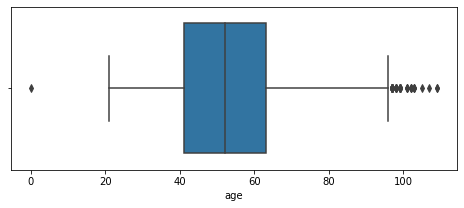

In [9]:
# age 
plt.figure(figsize=(8,3))
sns.boxplot(data = train_data,x='age')
# replace outliers in 'age' with 'age' median
train_data.loc[(train_data['age']<18) & (train_data['age']>96),'age'] = train_data['age'].median()

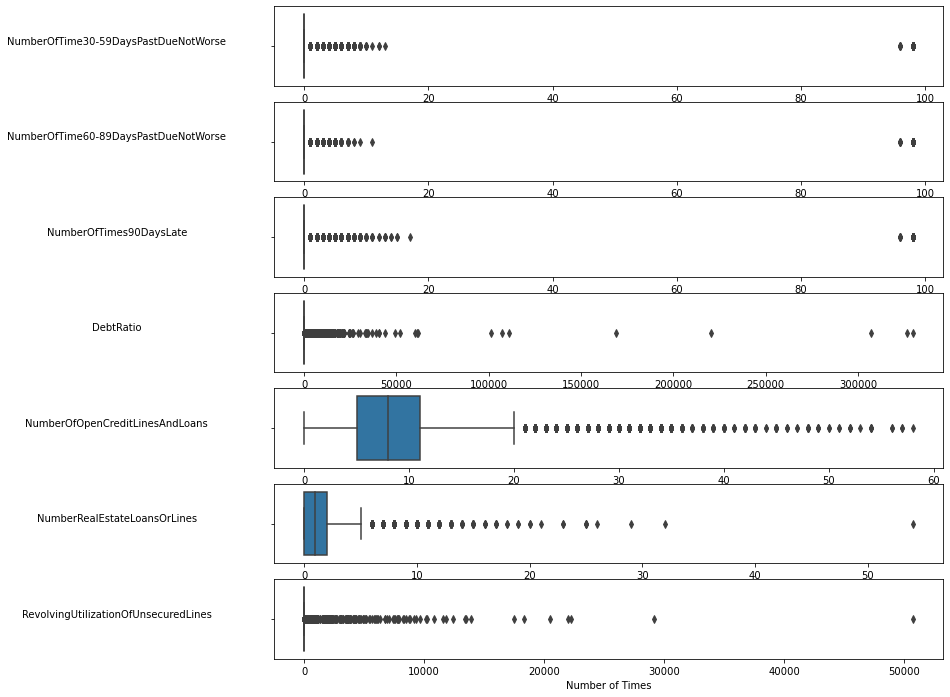

In [10]:
cols =["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse","NumberOfTimes90DaysLate", "DebtRatio","NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines", "RevolvingUtilizationOfUnsecuredLines"]
fig,axes = plt.subplots(len(cols),1,figsize=(12,12))
i = 0 
for c in cols:
    ax = sns.boxplot(data=train_data,x=c,ax = axes[i])
    ax.set_ylabel(c,rotation=0,labelpad=150)
    ax.set_xlabel('Number of Times')
    i += 1
plt.show()

/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


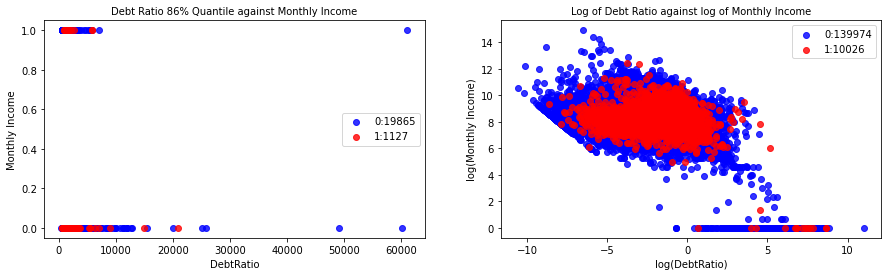

In [11]:
# debtratio
debtRatio_q = train_data['DebtRatio'].quantile(0.86)
# why chose 0.86%?

colormap = {0:'blue',1:'red'}
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
for delinquency, color in colormap.items():
    tmp = train_data[(train_data['DebtRatio']>debtRatio_q) & (train_data['SeriousDlqin2yrs']==delinquency)][
        ['DebtRatio','MonthlyIncome']]
    ax1.scatter(tmp['DebtRatio'],tmp['MonthlyIncome'],c=color,alpha=0.8, 
                label = str(delinquency) + ':{}'.format(tmp.shape[0]))
ax1.legend()
ax1.set_title('Debt Ratio 86% Quantile against Monthly Income',fontsize=10)
ax1.set_xlabel('DebtRatio')
ax1.set_ylabel('Monthly Income')

for delinquency,color in colormap.items():
    tmp = train_data[(train_data['SeriousDlqin2yrs']==delinquency)][['DebtRatio','MonthlyIncome']]
    ax2.scatter(np.log(tmp['DebtRatio']), np.log(tmp['MonthlyIncome']), c=color, alpha=0.8, 
                label= str(delinquency) + ":{}".format(tmp.shape[0]))
ax2.legend()
ax2.set_title("Log of Debt Ratio against log of Monthly Income",fontsize=10)
ax2.set_xlabel("log(DebtRatio)")
ax2.set_ylabel("log(Monthly Income)")
plt.show()

In [12]:
# Those people whose debt ratio was higher than 86% of the samples had monthly income at either 1 or 0. 
# I suspect that when monthly income was equal to 1 and debt ratio was high, this record might be wrong, 
# so I would rather delete it. 
# For debt ratio variable, we use log function on it.
train_data["DebtRatio"] = np.log(train_data["DebtRatio"])
train_data = train_data[train_data["MonthlyIncome"] != 1]
train_data["DebtRatio"].replace([np.inf, -np.inf], -10, inplace=True)
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149395.000000,149395.000000,149395.000000,149395.000000,149395.000000,1.196640e+05,149395.000000,149395.000000,149395.000000,149395.000000,145471.000000
mean,0.066997,6.071696,52.321657,0.420844,-0.193383,6.703940e+03,8.456742,0.265618,1.019070,0.239834,0.756467
std,0.250017,250.260307,14.767639,4.185920,3.882223,1.441315e+04,5.146399,4.162361,1.130484,4.148131,1.114591
min,0.000000,0.000000,0.000000,0.000000,-10.557414,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029854,41.000000,0.000000,-1.746317,3.425000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154310,52.000000,0.000000,-1.007962,5.416000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559158,63.000000,0.000000,-0.163184,8.272000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,12.705829,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
# I don't understand what is 'RevolvingUtilizationOfUnsecuredLines', so I refer to the description, 
# although I still don't know what it is afterwards.
data_description[data_description['Variable Name'] 
                 == 'RevolvingUtilizationOfUnsecuredLines']['Description'].to_list()

['Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits']

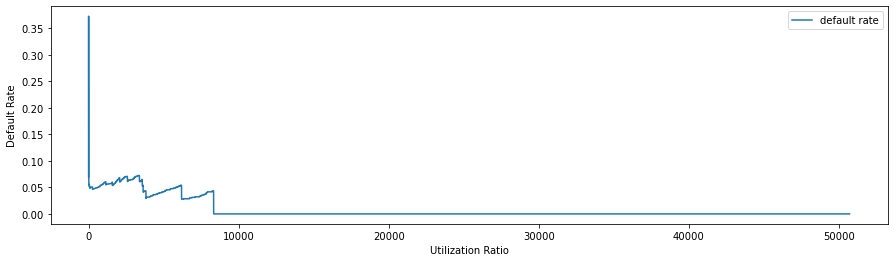

In [14]:
x_list = []
y_list = []
for u in range(int(train_data['RevolvingUtilizationOfUnsecuredLines'].max())):
    default_rate = train_data[train_data['RevolvingUtilizationOfUnsecuredLines']>u]['SeriousDlqin2yrs'].mean()
    x_list.append(u)
    y_list.append(default_rate)
fig,ax1= plt.subplots(figsize=(15,4))
df = pd.DataFrame({'utilization':x_list,'default rate':y_list})
df.plot('utilization','default rate',ax=ax1)
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Utilization Ratio')
plt.show()

### __Question__ 
__In the line above, I had no idea why it was selecting data by the condition of '>u', rather than '==u' or '<u'. I tried all three, but the latter two turned out pretty bad. To my understanding, with '==u', at every level of 'RevolvingUtilizationOfUnsecuredLines', the default rate is calculated, while with '<u', it might have a cumulative result. However, the graphs drawn weren't really good. So, if you know what does '>u' mean, please leave a comment and tell me.__

Remove Outliers at point Utilization =8328


Text(0.5, 0, 'Utilization Ratio')

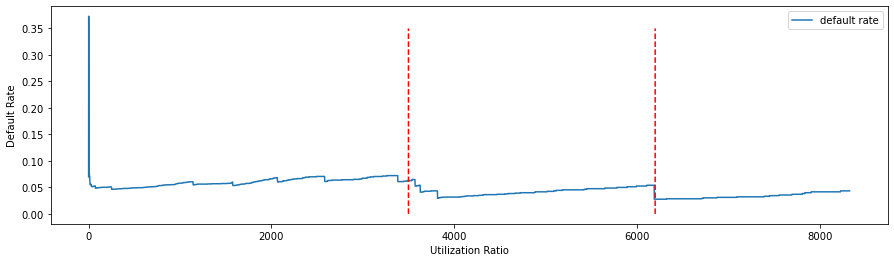

In [15]:
# From the chart above, when utilization reaches certain level, the default rate suddenly drops to zero
# so I might just plot the part before this point.
# the first step is to find out the minimum point of utilization when default rate flats at zero.
# the second step is to select the data less than this minimum level.
utilization_outlier = df[df['default rate'] ==0]['utilization'].min()
print(f'Remove Outliers at point Utilization ={utilization_outlier}')

dftemp = df[df['utilization']<utilization_outlier]
fig,ax2= plt.subplots(figsize=(15,4))
dftemp.plot('utilization','default rate',ax=ax2)
ax2.plot([3500 for i in range(dftemp.shape[0])], np.linspace(0,0.35,dftemp.shape[0]), 'r--')
ax2.plot([6200 for i in range(dftemp.shape[0])], np.linspace(0,0.35,dftemp.shape[0]), 'r--')
ax2.set_ylabel("Default Rate")
ax2.set_xlabel("Utilization Ratio")

In [16]:
# we can tell from the chart that 
# when when utilization reaches certain level,the default rate suddenly drops to zero.
# While between some intervals, the relationship between utilization ratio and default rate tends to be positive. 
# As a result, after deleting those utilization outliers, cut the remaining into three parts.
removedUtilization = train_data[train_data['RevolvingUtilizationOfUnsecuredLines']<=utilization_outlier]
removedUtilization.loc[:,'RevolvingUtilizationOfUnsecuredLines'] = pd.cut(removedUtilization['RevolvingUtilizationOfUnsecuredLines'],
                                                                    [0,3500,6200,np.inf],labels=[0,1,2],include_lowest=True)

/Library/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Deal with missing values

In [17]:
train_data.isnull().sum().to_dict()

{'SeriousDlqin2yrs': 0,
 'RevolvingUtilizationOfUnsecuredLines': 0,
 'age': 0,
 'NumberOfTime30-59DaysPastDueNotWorse': 0,
 'DebtRatio': 0,
 'MonthlyIncome': 29731,
 'NumberOfOpenCreditLinesAndLoans': 0,
 'NumberOfTimes90DaysLate': 0,
 'NumberRealEstateLoansOrLines': 0,
 'NumberOfTime60-89DaysPastDueNotWorse': 0,
 'NumberOfDependents': 3924}

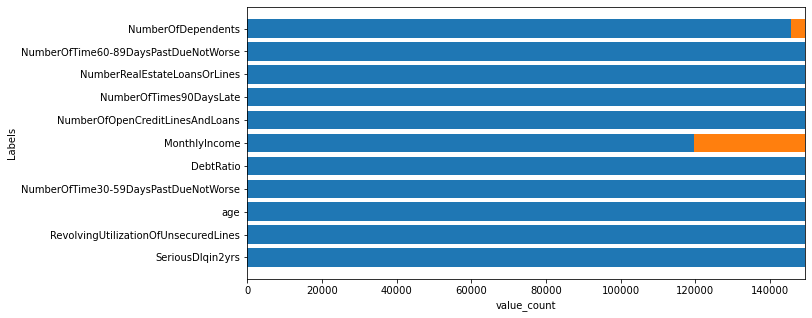

In [18]:
cols = train_data.columns
nullcounts = []
value_counts = []
missing_value_dict = train_data.isnull().sum().to_dict()
for col in cols:
    nullcounts.append(missing_value_dict[col])
    value_counts.append(train_data[col].shape[0] - missing_value_dict[col])

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(cols,value_counts,label='not missing')
ax.barh(cols,nullcounts,label='missing',left=value_counts)
ax.set_xlabel('value_count')
ax.set_ylabel('Labels')
plt.show()

In [19]:
# as missing values only exist in two feature, 
# I split the data by age and interpolate missing values with its median value of each category.
imputeDf = train_data[['age','NumberOfDependents','MonthlyIncome']].copy()
imputeDf['seniority'] = pd.cut(imputeDf['age'],[0,35,60,np.inf],
                               labels=['junior','senior','mature'],include_lowest=True)

In [20]:
income_dict = imputeDf.groupby('seniority')['MonthlyIncome'].median().to_dict()
income_dict

{'junior': 3520.0, 'senior': 6000.0, 'mature': 5250.0}

In [21]:
# impute Monthly Income by median of seniority
for label, median in income_dict.items():
    imputeDf['MonthlyIncome'] = np.where((imputeDf['MonthlyIncome'].isnull()) & (imputeDf['seniority'] ==label),
                                        int(median),imputeDf['MonthlyIncome'])
train_data.loc[:,'MonthlyIncome'] = imputeDf['MonthlyIncome']
# impute Number of Dependents with mode
train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].mode()[0],inplace=True)

### correlation of each variable

<AxesSubplot:>

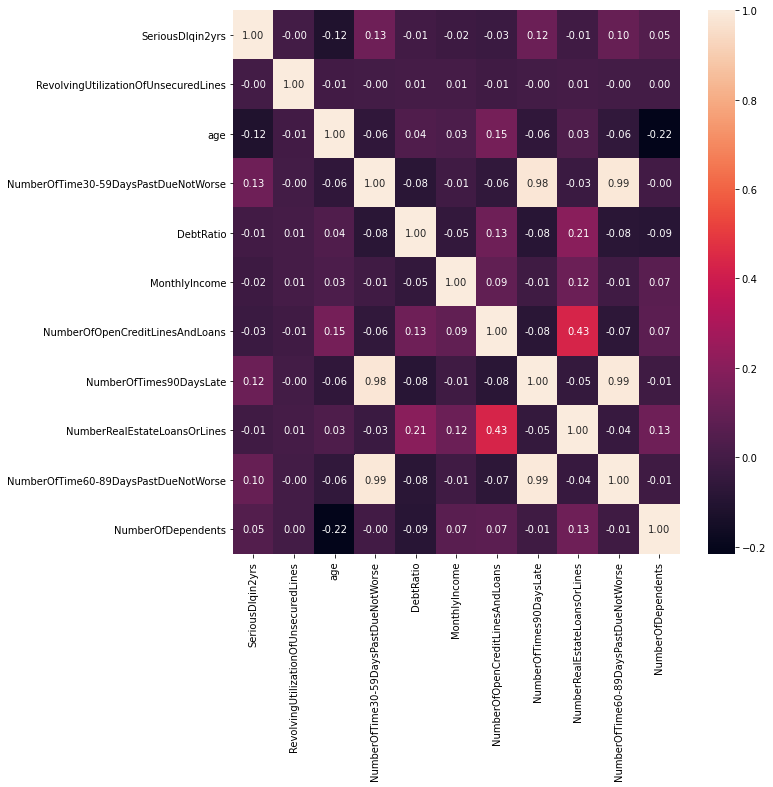

In [22]:
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f')

In [25]:
# Three variables - 'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate', 
# and 'NumberOfTime60-89DaysPastDueNotWorse'- 
# are highly correlated, partly because of their common anamolies. 
# I imputed those anamolies with their reasonable maximum, 
# which is their maiximun when those anamolies are deleted.
# first, get to know their reasonable maximum by unique() method
day_due_list = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate',
                'NumberOfTime60-89DaysPastDueNotWorse']
for i in day_due_list:
    print(f'{i}:{ train_data[i].sort_values().unique()}')

NumberOfTime30-59DaysPastDueNotWorse:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 96 98]
NumberOfTimes90DaysLate:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 96 98]
NumberOfTime60-89DaysPastDueNotWorse:[ 0  1  2  3  4  5  6  7  8  9 11 96 98]


In [26]:
cols = train_data.columns
tmpdf = train_data[(train_data["NumberOfTime30-59DaysPastDueNotWorse"] == 98) & (
    train_data["NumberOfTime60-89DaysPastDueNotWorse"] == train_data["NumberOfTime30-59DaysPastDueNotWorse"]) & (
    train_data["NumberOfTimes90DaysLate"] == train_data["NumberOfTime60-89DaysPastDueNotWorse"])][cols]
print("98 times past due where 3 columns have same value: {}".format(tmpdf.shape[0]))

98 times past due where 3 columns have same value: 262


In [27]:
# Impute outliers with next max value
maximum_list = [13,17,11]
maximum_map = dict(zip(day_due_list,maximum_list))
maximum_map

{'NumberOfTime30-59DaysPastDueNotWorse': 13,
 'NumberOfTimes90DaysLate': 17,
 'NumberOfTime60-89DaysPastDueNotWorse': 11}

In [28]:
for column, value in maximum_map.items():
    train_data.loc[train_data[column]>=96,column] = maximum_map[column]

In [29]:
# pack the cleaning process into a function
def data_process(df,is_submission=False):
    print('shape before:{}'.format(df.shape))
    df.loc[(df['age']<18) & (df['age']>96),'age'] = df['age'].median()
    
    df['DebtRatio'] = np.log(df['DebtRatio'])
    df["DebtRatio"].replace([np.inf, -np.inf], -10, inplace=True)
    
    if not is_submission:
        df = df[df["MonthlyIncome"] != 1]
    utilization_outlier = 8238
    if not is_submission:
        df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= utilization_outlier]
    
    imputeDf = df[['age','NumberOfDependents','MonthlyIncome']].copy()
    imputeDf['seniority'] = pd.cut(imputeDf['age'],[0,35,60,np.inf],
                               labels=['junior','senior','mature'],include_lowest=True)
    income_dict = imputeDf.groupby('seniority')['MonthlyIncome'].median().to_dict()
    for label, median in income_dict.items():
        imputeDf['MonthlyIncome'] = np.where((imputeDf['MonthlyIncome'].isnull()) & (imputeDf['seniority'] ==label),
                                        int(median),imputeDf['MonthlyIncome'])
    df['MonthlyIncome'] = imputeDf["MonthlyIncome"]
    df['NumberOfDependents'].fillna(0, inplace=True)
    
    maximum_map = dict(zip(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate',
                            'NumberOfTime60-89DaysPastDueNotWorse'],
                          [13,17,11]))
    for column, value in maximum_map.items():
        df.loc[df[column]>=96,column] = maximum_map[column]
    print("Shape after: {}".format(df.shape))
    
    return df

In [30]:
train_data = pd.read_csv(directory+'cs-training.csv')
train_data = train_data.iloc[:,1:]
train_data = data_process(train_data)

shape before:(150000, 11)
Shape after: (149372, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

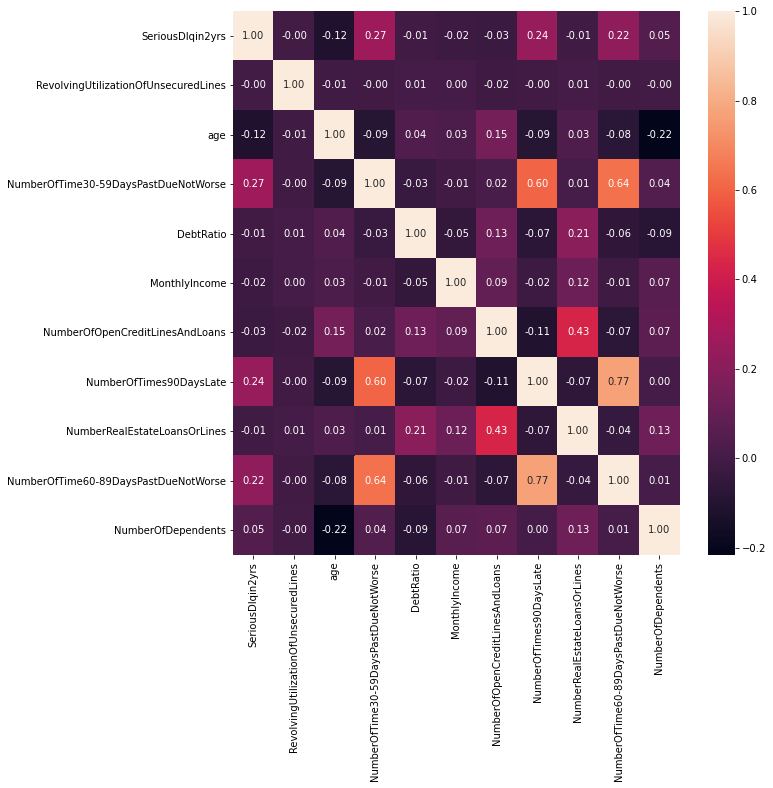

In [31]:
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")

### Builidng Logistic Regression model

In [32]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV

0.7999053892347274


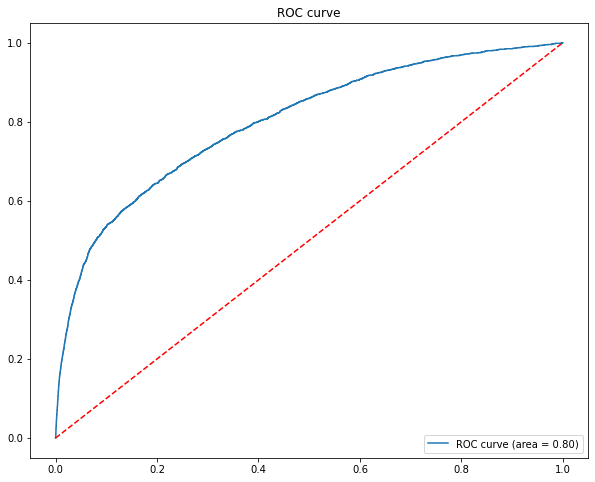

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_data.iloc[:,1:],
                                train_data.iloc[:,0],random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LogisticRegression(random_state=42)
lr_model = lr.fit(X_train_scaled,y_train)
logit_scores_proba = lr_model.predict_proba(X_test_scaled)
logit_scores = logit_scores_proba[:,1]
# draw roc curve
def plot_roc_curve(y_test,y_predcit):
    fpr,tpr,_ = roc_curve(y_test,y_predcit)
    roc_auc = auc(fpr,tpr)
    print(roc_auc)
    plt.figure(figsize=(10,8))
    plt.title('ROC curve')
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
plot_roc_curve(y_test,logit_scores)

### Builidng Random Forest model

In [34]:
random_forest = RandomForestClassifier()
param_grid= {
    'n_estimators':[9,18,27,36,100],
    'max_depth':[5,7,9],
    'min_samples_leaf':[2,4,6,8]
}
rf_model = RandomizedSearchCV(random_forest,param_distributions=param_grid,cv=5)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100]})

In [35]:
rf_model.best_params_

{'n_estimators': 18, 'min_samples_leaf': 6, 'max_depth': 9}

0.8679201257893236


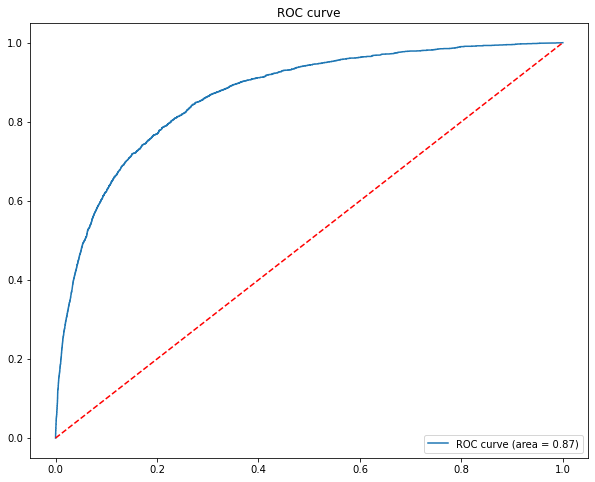

In [36]:
best_estimator_rf = rf_model.best_estimator_
best_estimator_rf.fit(X_train,y_train)
y_pred_rf = best_estimator_rf.predict_proba(X_test)[:,1]
plot_roc_curve(y_test,y_pred_rf)

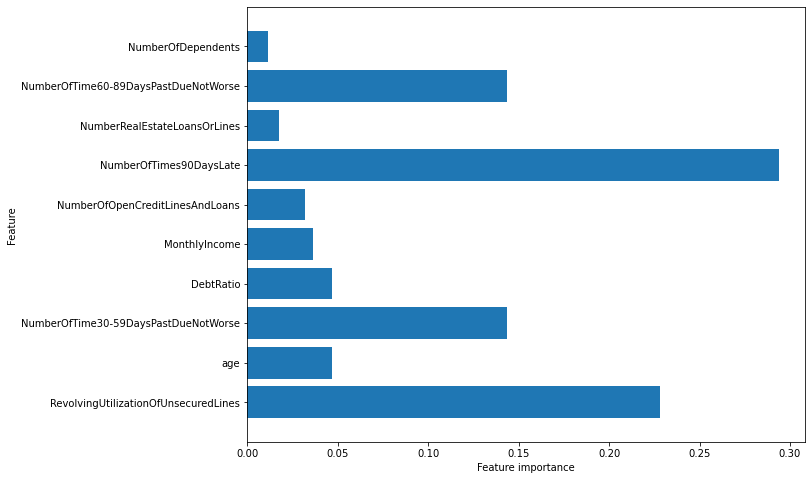

In [37]:
def plot_feature_importance(model):
    plt.figure(figsize=(10,8))
    n_features = X_train.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X_train.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)

plot_feature_importance(best_estimator_rf)

### Submission 

In [38]:
test_file = directory + 'cs-test.csv'
test_data = pd.read_csv(test_file)
test_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [39]:
test_data = test_data.iloc[:,1:]
test_data = data_process(test_data,True)

shape before:(101503, 11)
Shape after: (101503, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
test_data.drop(['SeriousDlqin2yrs'],axis=1,inplace=True)

In [41]:
submission_score = best_estimator_rf.predict_proba(test_data)[:,1]

In [42]:
submission_score.shape[0]

101503

In [59]:
submission = pd.DataFrame( {'Id': np.arange(1,submission_score.shape[0]+1), 'Probability': submission_score})
submission.to_csv(directory+'gimme_submision.csv', index=False)

### Weight of Evidence transformation

I will take a step forward and try using WOE transformation as features to predict in logistic regression model.
<br> Regarding WOE transformation, please check [here](https://github.com/Canshuo/data-analysis-projects-with-python/blob/main/WEIGHT%20OF%20EVIDENCE%20(WOE)%20AND%20INFORMATION%20VALUE%20(IV)%20EXPLAINED.ipynb)

In [43]:
def optimal_binning_boundary(x: pd.Series, y: pd.Series, nan: float = -999.) -> list:
    '''
        use DecisionTree to get optimal bins
    '''
    import pandas as pd 
    import numpy as np 
    from sklearn.tree import DecisionTreeClassifier
    
    boundary = []  
    
    x = x.fillna(nan).values  
    y = y.values
    
    clf = DecisionTreeClassifier(criterion='entropy',    
                                 max_leaf_nodes=6,       
                                 min_samples_leaf=0.05)  

    clf.fit(x.reshape(-1, 1), y)  
    
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold
    
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  
    boundary = [min_x] + boundary + [max_x]

    return boundary

def feature_woe_iv(x: pd.Series, y: pd.Series, nan: float = -999.) -> pd.DataFrame:
    '''
        calculate the woe value and iv for each variable, and return a DataFrame
    '''
    x = x.fillna(nan)
    boundary = optimal_binning_boundary(x, y, nan)        
    df = pd.concat([x, y], axis=1)                        
    df.columns = ['x', 'y']                               
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  
    
    grouped = df.groupby('bins')['y']                     
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])

    result_df['good_pct'] = result_df['good'] / result_df['good'].sum()       
    result_df['bad_pct'] = result_df['bad'] / result_df['bad'].sum()          
    result_df['total_pct'] = result_df['total'] / result_df['total'].sum()    

    result_df['bad_rate'] = result_df['bad'] / result_df['total']             
    
    result_df['woe'] = np.log(result_df['good_pct'] / result_df['bad_pct'])              
    result_df['iv'] = (result_df['good_pct'] - result_df['bad_pct']) * result_df['woe']  
    
    return result_df

### interpretation the IV value
<table>
<tr>
<td>Information Value </td>
<td>Variable Predictiveness</td>
</tr>
<tr>
<td>Less than 0.02 </td>
<td>Not useful for prediction</td>
</tr>
<tr>
<td>0.02 to 0.1 </td>
<td>Weak predictive Power</td>
</tr>
<tr>
<td>0.1 to 0.3 </td>
<td>Medium predictive Power</td>
</tr>
<tr>
<td>0.3 to 0.5</td>
<td>Strong predictive Power</td>
</tr>
<tr>
<td>0.5 </td>
<td>Suspicious Predictive Power</td>
</tr>
</table>

If the IV statistic is:
- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
- 0.5, suspicious relationship (Check once)

In [44]:
train_data = pd.read_csv(directory+'cs-training.csv')
train_data = train_data.iloc[:,1:]
train_data = data_process(train_data)

shape before:(150000, 11)
Shape after: (149372, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
Y = train_data['SeriousDlqin2yrs']
X_feature = train_data.drop('SeriousDlqin2yrs',axis=1)
iv_bins = [0,0.02,0.1,0.3,0.5,1]
labels = ['unpredictive','weak','medium','strong','Suspicious']
iv_sum = []
woes = dict()
bins = dict()
woeData = pd.DataFrame()
for i in X_feature.columns:
    bin_ = optimal_binning_boundary(X_feature[i],Y)
    bins[i]=bin_
    iv_table = feature_woe_iv(X_feature[i],Y)
    woes[i] = iv_table['woe']
    iv_sum.append(iv_table['iv'].sum())
    woeData[i]= pd.cut(X_feature[i],bins=bin_,labels=iv_table['woe'].values,include_lowest=True)
    
iv = pd.DataFrame({'variables':X_feature.columns,'IV value':iv_sum})
iv['evaluation'] = pd.cut(iv['IV value'],bins=iv_bins,labels=labels)

In [46]:
iv

,variables,IV value,evaluation
0,RevolvingUtilizationOfUnsecuredLines,1.104352,NaN
1,age,0.262025,medium
2,NumberOfTime30-59DaysPastDueNotWorse,0.742203,Suspicious
3,DebtRatio,0.074746,weak
4,MonthlyIncome,0.117894,medium
5,NumberOfOpenCreditLinesAndLoans,0.084156,weak
6,NumberOfTimes90DaysLate,0.838910,Suspicious
7,NumberRealEstateLoansOrLines,0.055385,weak
8,NumberOfTime60-89DaysPastDueNotWorse,0.573638,Suspicious
9,NumberOfDependents,0.033921,weak


In [47]:
# pack the cleaning process and WOE transformation into a function
def data_process(df,is_submission=False):
    print('shape before:{}'.format(df.shape))
    df.loc[(df['age']<18) & (df['age']>96),'age'] = df['age'].median()
    
    df['DebtRatio'] = np.log(df['DebtRatio'])
    df["DebtRatio"].replace([np.inf, -np.inf], -10, inplace=True)
    
    if not is_submission:
        df = df[df["MonthlyIncome"] != 1]
    utilization_outlier = 8238
    if not is_submission:
        df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= utilization_outlier]
    
    imputeDf = df[['age','NumberOfDependents','MonthlyIncome']].copy()
    imputeDf['seniority'] = pd.cut(imputeDf['age'],[0,35,60,np.inf],
                               labels=['junior','senior','mature'],include_lowest=True)
    income_dict = imputeDf.groupby('seniority')['MonthlyIncome'].median().to_dict()
    for label, median in income_dict.items():
        imputeDf['MonthlyIncome'] = np.where((imputeDf['MonthlyIncome'].isnull()) & (imputeDf['seniority'] ==label),
                                        int(median),imputeDf['MonthlyIncome'])
    df['MonthlyIncome'] = imputeDf["MonthlyIncome"]
    df['NumberOfDependents'].fillna(0, inplace=True)
    
    maximum_map = dict(zip(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],
                          [13,17,11]))
    for column, value in maximum_map.items():
        df.loc[df[column]>=96,column] = maximum_map[column]
    print("Shape after: {}".format(df.shape))
    
    return df
def optimal_binning_boundary(x: pd.Series, y: pd.Series, nan: float = -999.) -> list:
    '''
        use DecisionTree to get optimal bins
    '''
    import pandas as pd 
    import numpy as np 
    from sklearn.tree import DecisionTreeClassifier
    
    boundary = []  
    
    x = x.fillna(nan).values  
    y = y.values
    
    clf = DecisionTreeClassifier(criterion='entropy',    
                                 max_leaf_nodes=6,       
                                 min_samples_leaf=0.05)  

    clf.fit(x.reshape(-1, 1), y)  
    
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold
    
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  
    boundary = [min_x] + boundary + [max_x]

    return boundary

def feature_woe_iv(x: pd.Series, y: pd.Series, nan: float = -999.) -> pd.DataFrame:
    '''
        calculate the woe value and iv for each variable, and return a DataFrame
    '''
    x = x.fillna(nan)
    boundary = optimal_binning_boundary(x, y, nan)        
    df = pd.concat([x, y], axis=1)                        
    df.columns = ['x', 'y']                               
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  
    
    grouped = df.groupby('bins')['y']                     
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])

    result_df['good_pct'] = result_df['good'] / result_df['good'].sum()       
    result_df['bad_pct'] = result_df['bad'] / result_df['bad'].sum()          
    result_df['total_pct'] = result_df['total'] / result_df['total'].sum()    

    result_df['bad_rate'] = result_df['bad'] / result_df['total']             
    
    result_df['woe'] = np.log(result_df['good_pct'] / result_df['bad_pct'])              
    result_df['iv'] = (result_df['good_pct'] - result_df['bad_pct']) * result_df['woe']  
    
    return result_df

def WOE_tranform(df,is_submission=False):
    import pickle
    df = data_process(df,is_submission)
    target = 'SeriousDlqin2yrs'
    X_feature = df.drop([target],axis=1)
    Y = df[target]
    woeData = pd.DataFrame()
    if not is_submission:
        woes = dict()
        bins = dict()
        for i in X_feature.columns:
            bin_ = optimal_binning_boundary(X_feature[i],Y)
            bins[i] = bin_
            iv_table = feature_woe_iv(X_feature[i],Y)
            woes[i] = iv_table['woe'].values
            woeData[i] = pd.cut(X_feature[i],bins=bin_,labels=iv_table['woe'].values,include_lowest=True)
        with open('bins.pickle', 'wb') as handle:
            pickle.dump(bins, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open('woes.pickle', 'wb') as handle:
            pickle.dump(woes, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    elif is_submission:
        with open('bins.pickle','rb') as handle:
            bins = pickle.load(handle)
        with open('woes.pickle', 'rb') as handle:
            woes = pickle.load(handle)
        for i in X_feature.columns:
            woeData[i] = pd.cut(X_feature[i],bins=bins[i],labels=woes[i],include_lowest=True)
           
    return woeData

### Builidng Logistic Regression model with the Weight-of-evidence-transformed data

In [48]:
train_data = pd.read_csv(directory+'cs-training.csv')
train_data = train_data.iloc[:,1:]
woeData = WOE_tranform(train_data)
Y = data_process(train_data)['SeriousDlqin2yrs']

shape before:(150000, 11)
Shape after: (149372, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


shape before:(150000, 11)
Shape after: (149372, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
with open('bins.pickle','rb') as handle:
    bins = pickle.load(handle)
with open('woes.pickle', 'rb') as handle:
    woes = pickle.load(handle)

In [50]:
bins

{'RevolvingUtilizationOfUnsecuredLines': [0.0,
  0.11458224803209305,
  0.21776090562343597,
  0.49497613310813904,
  0.6981423199176788,
  0.8596274554729462,
  8228.1],
 'age': [0, 36.5, 43.5, 55.5, 62.5, 67.5, 109.1],
 'NumberOfTime30-59DaysPastDueNotWorse': [0, 0.5, 1.5, 13.1],
 'DebtRatio': [-10.557414019942792,
  -0.8596250116825104,
  -0.6822199523448944,
  -0.4251452535390854,
  1.379482090473175,
  6.903244972229004,
  12.805829232925257],
 'MonthlyIncome': [0.0, 1667.5, 3728.5, 4833.5, 5254.5, 6643.5, 3008750.1],
 'NumberOfOpenCreditLinesAndLoans': [0, 2.5, 3.5, 5.5, 8.5, 13.5, 58.1],
 'NumberOfTimes90DaysLate': [0, 0.5, 17.1],
 'NumberRealEstateLoansOrLines': [0, 0.5, 1.5, 2.5, 54.1],
 'NumberOfTime60-89DaysPastDueNotWorse': [0, 0.5, 11.1],
 'NumberOfDependents': [0.0, 0.5, 1.5, 2.5, 20.1]}

In [51]:
woes

{'RevolvingUtilizationOfUnsecuredLines': array([ 1.35823033,  0.84407208,  0.28712742, -0.38064227, -0.8232472 ,
        -1.36752159]),
 'age': array([-0.54960355, -0.32714448, -0.14109609,  0.30110308,  0.72847776,
         1.13805838]),
 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.54281452, -0.90388228, -1.90172482]),
 'DebtRatio': array([ 0.13727978, -0.08639704, -0.31915881, -0.5948903 ,  0.0468837 ,
         0.32858818]),
 'MonthlyIncome': array([-0.20987645, -0.43621571, -0.2149676 ,  0.58549742, -0.0170985 ,
         0.33943508]),
 'NumberOfOpenCreditLinesAndLoans': array([-0.7320601 , -0.12868809,  0.05035757,  0.23768818,  0.14239564,
        -0.04546018]),
 'NumberOfTimes90DaysLate': array([ 0.39033997, -2.29908654]),
 'NumberRealEstateLoansOrLines': array([-0.23697935,  0.25630295,  0.18930233, -0.24924245]),
 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.28863996, -2.0811324 ]),
 'NumberOfDependents': array([ 0.14994168, -0.10060788, -0.21114462, -0.3537308 ])}

0.8644832566581159


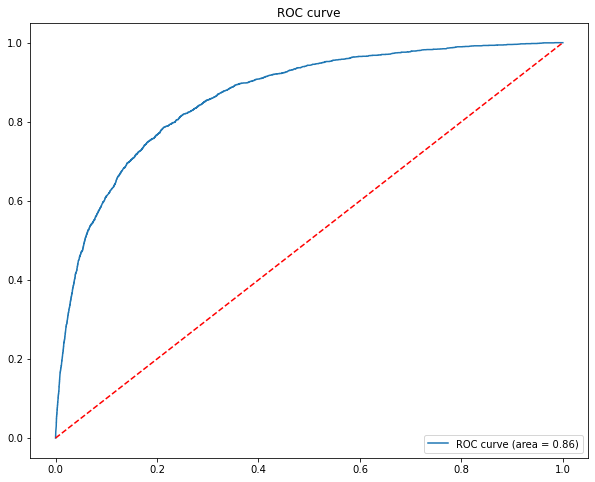

In [52]:
X_train, X_test, y_train, y_test = train_test_split(woeData,
                                Y,random_state=42)

lr = LogisticRegression(random_state=42)
lr_model = lr.fit(X_train,y_train)
logit_scores_proba = lr_model.predict_proba(X_test)
logit_scores = logit_scores_proba[:,1]
# draw roc curve
def plot_roc_curve(y_test,y_predcit):
    fpr,tpr,_ = roc_curve(y_test,y_predcit)
    roc_auc = auc(fpr,tpr)
    print(roc_auc)
    plt.figure(figsize=(10,8))
    plt.title('ROC curve')
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
plot_roc_curve(y_test,logit_scores)

## Submission

In [53]:
test_file = '/Users/canshuoguo/Downloads/GiveMeSomeCredit/cs-test.csv'
test_data = pd.read_csv(test_file)
test_data = test_data.iloc[:,1:]

In [54]:
woeData_test = WOE_tranform(test_data,True)
woeData_test

shape before:(101503, 11)
Shape after: (101503, 11)


/Library/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-1.367522,-0.327144,0.542815,0.137280,-0.017098,0.050358,0.39034,-0.236979,0.288640,0.149942
1,0.287127,0.301103,0.542815,-0.319159,0.339435,-0.045460,0.39034,-0.249242,0.288640,-0.211145
2,1.358230,0.301103,0.542815,-0.594890,0.585497,0.142396,0.39034,0.256303,0.288640,-0.211145
3,0.287127,-0.327144,-0.903882,-0.594890,-0.436216,0.237688,0.39034,0.189302,0.288640,0.149942
4,-1.367522,-0.549604,0.542815,0.137280,-0.214968,0.050358,0.39034,-0.236979,0.288640,-0.100608
...,...,...,...,...,...,...,...,...,...,...
101498,0.287127,-0.549604,0.542815,0.137280,-0.209876,0.050358,0.39034,-0.236979,0.288640,0.149942
101499,-1.367522,-0.549604,-1.901725,-0.594890,0.339435,0.237688,0.39034,0.189302,0.288640,-0.353731
101500,1.358230,1.138058,0.542815,0.046884,-0.017098,-0.128688,0.39034,-0.236979,0.288640,0.149942
101501,0.287127,0.301103,0.542815,0.328588,-0.017098,0.237688,0.39034,0.189302,-2.081132,-0.353731


In [55]:
woeData_test.isnull().any()

RevolvingUtilizationOfUnsecuredLines     True
age                                     False
NumberOfTime30-59DaysPastDueNotWorse     True
DebtRatio                                True
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans          True
NumberOfTimes90DaysLate                  True
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [56]:
# because there are still missing values, I interpolate them with its median value of each age group.
## first, get the columns needed to be interpolated.
cols = woeData_test.columns[woeData_test.isnull().any()].to_list()
imputeDf = pd.concat([woeData_test['age'],woeData_test[cols]],axis=1)
for i in cols:
    imputeDf[i]= pd.to_numeric(imputeDf[i],errors='ignore')

In [57]:
imputeDf.dtypes

age                                     category
RevolvingUtilizationOfUnsecuredLines     float64
NumberOfTime30-59DaysPastDueNotWorse     float64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans          float64
NumberOfTimes90DaysLate                  float64
NumberOfDependents                       float64
dtype: object

In [58]:
for col in cols:
    median_dict = imputeDf.groupby('age')[col].median().to_dict()
    for label, median in median_dict.items():
        imputeDf[col] = np.where((imputeDf[col].isnull()) & (imputeDf['age'] ==label),
                                        int(median),imputeDf[col])
        woeData_test.loc[:,col] = imputeDf[col]

In [59]:
submission_score_2 = lr_model.predict_proba(woeData_test)[:,1]
submission_score_2.shape[0]

101503

In [63]:
submission = pd.DataFrame( {'Id': np.arange(1,submission_score.shape[0]+1), 'Probability': submission_score})
submission.to_csv(directory+'gimme_submision_2.csv', index=False)